# Proyecto 2 - Analisis Exploratorio
|      Nombre     | Carnet |
|:---------------:|:------:|
| André Rodríguez |  18332 |
|   Cesar Rodas   |  16776 |
|  Javier Ramirez |  18099 |
|  Abril Palencia |  18198 |

### Importación de librerías
Se importan las librerías necesarias para el funcionamiento del laboratorio:

In [120]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Se carga el archivo con los datos preprocesados

In [121]:
data_tw = pd.read_csv('clean_data.csv')

data_tw[:5]

,keyword,location,text,target
0,none,none,deeds reason earthquake may allah forgive us,1
1,none,none,forest fire near ronge sask canada,1
2,none,none,residents asked shelter place notified officer...,1
3,none,none,people receive wildfires evacuation orders cal...,1
4,none,none,got sent photo ruby alaska smoke wildfires pou...,1


## Analisis Exploratorio

Funciones para obtener información para el analisis exploratorio.

In [123]:
# Funcion para mostrar los 10 items mas frecuentes en una columna de un dataset
def show_dt_frequency(dt,column_name,separator,limit):
  dt[column_name] = dt[column_name].astype(str)

  cat = [line.split(separator) for line in dt[column_name]]

  cat = [y for x in cat for y in x]

  freq = dict(Counter(cat))

  sorted_freq = sorted(freq.items(), key=lambda x:x[1])

  for x in range(1,limit+1):
    item = sorted_freq[len(sorted_freq)-x]
    print(str(x) + ". " + item[0] + " => " + str(item[1]))

In [124]:
# Funcion para mostrar la nube de palabras
def generate_word_cloud(arr,title):
  word_map = WordCloud(background_color='white',).generate(" ".join(arr))
  plt.figure(figsize=(10,10))
  plt.imshow(word_map)
  plt.title("Nube de palabras " + title)
  plt.show()

## Nube de palabras
<br>
Nube de palabras para ver las palabras que más se repiten en el texto de los tweets

In [125]:
data_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   3271 non-null   object
 1   location  3228 non-null   object
 2   text      3271 non-null   object
 3   target    3271 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 102.3+ KB


In [126]:
keywords = data_tw.loc[data_tw['keyword'] != 'None']
keywords = data_tw.loc[data_tw['keyword'] != 'none']
tweets = [words.split(',') for words in keywords['keyword']]
tweets = [y for x in tweets for y in x]
text = [words.split(',') for words in keywords['text']]
text = [y for x in text for y in x]


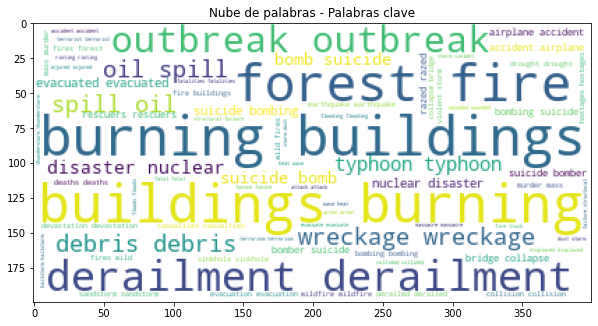

In [127]:
generate_word_cloud(tweets,"- Palabras clave")

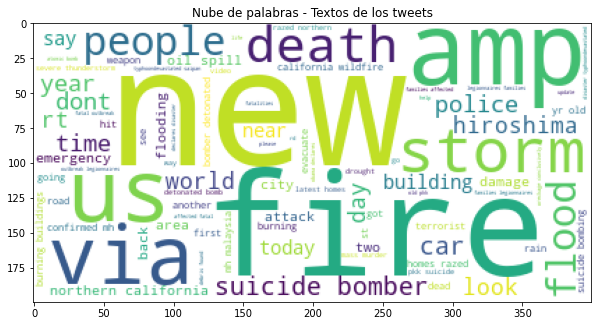

In [128]:
generate_word_cloud(text,"- Textos de los tweets")